# Import Modules

In [2]:
# numpy,pandas,scipy,math,matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

# Import Data

In [3]:
# Loading preprocessed dataset from previous EDA section
rawData = pd.read_csv('new_credit.csv')
rawData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sep_Status,Aug_Status,July_Status,June_Status,May_Status,...,June_Bill,May_Bill,April_Bill,Sep_Paid,Aug_Paid,July_Paid,June_Paid,May_Paid,April_Paid,Default_Payment_Next_Month
0,20000,2,2,1,0,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,0,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,1,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,2,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# To check the data type of each variable to make sure all data are numerical
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                      30000 non-null int64
SEX                            30000 non-null int64
EDUCATION                      30000 non-null int64
MARRIAGE                       30000 non-null int64
AGE                            30000 non-null int64
Sep_Status                     30000 non-null int64
Aug_Status                     30000 non-null int64
July_Status                    30000 non-null int64
June_Status                    30000 non-null int64
May_Status                     30000 non-null int64
April_Status                   30000 non-null int64
Sep_Bill                       30000 non-null int64
Aug_Bill                       30000 non-null int64
July_Bill                      30000 non-null int64
June_Bill                      30000 non-null int64
May_Bill                       30000 non-null int64
April_Bill                     30000 non-null int64
Sep_Pai

In [5]:
rawData.iloc[:,0:4]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE
0,20000,2,2,1
1,120000,2,2,2
2,90000,2,2,2
3,50000,2,2,1
4,50000,1,2,1
...,...,...,...,...
29995,220000,1,3,1
29996,150000,1,3,2
29997,30000,1,2,2
29998,80000,1,3,1


# Build Training and Testing Sets

In [6]:
# Select the Independent Variables (except "Default_Payment_Next_Month ")
features = rawData.iloc[:,0:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sep_Status,Aug_Status,July_Status,June_Status,May_Status,...,July_Bill,June_Bill,May_Bill,April_Bill,Sep_Paid,Aug_Paid,July_Paid,June_Paid,May_Paid,April_Paid
0,20000,2,2,1,0,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,0,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,0,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,1,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,2,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [7]:
# Select the Dependent Variable
depVar = rawData['Default_Payment_Next_Month ']

In [8]:
# Randomly split training and testing datasets by Sci-Kit Learn
from sklearn.model_selection import train_test_split

In [9]:
# Split into 4 Dataframes
X_train, X_test, y_train, y_test = train_test_split(features, depVar, test_size=0.25, random_state = 123)

In [10]:
# Check for X_train to see if it is randomly listed
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Sep_Status,Aug_Status,July_Status,June_Status,May_Status,...,July_Bill,June_Bill,May_Bill,April_Bill,Sep_Paid,Aug_Paid,July_Paid,June_Paid,May_Paid,April_Paid
16095,140000,2,2,1,1,1,2,3,2,0,...,61459,59798,61287,8383,5200,0,0,3009,1000,94000
28548,210000,2,2,2,0,0,0,0,-2,-2,...,0,0,0,0,1000,0,0,0,0,0
25096,20000,1,3,2,2,-1,0,-1,-1,-1,...,390,18280,2880,1600,1105,390,18280,2880,1600,0
12260,90000,2,2,2,0,2,4,4,3,4,...,37825,40299,39093,38167,2000,0,3400,0,0,1000
21549,50000,2,3,2,0,-2,-2,-2,-2,-2,...,1697,0,0,5000,0,1699,0,0,5000,0


In [11]:
# Use the shape function to double check that the split was made 75%/25%:
X_train.shape, X_test.shape

((22500, 23), (7500, 23))

# Model Building
## Using train_test_split Method

* Here we use five classification algorithms:  
 * Random Forest
 * Supportive Vector Machine (SVM) 
 * Gradient Boosting
 * Logistics Regression
 * Decision Trees

### Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
modelRF = RandomForestClassifier(n_estimators=100)

In [76]:
modelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [116]:
modelRF.score(X_train,y_train)

0.9966666666666667

### Support Vector Machines (SVM)

In [79]:
from sklearn.svm import SVC

In [80]:
modelSVM = SVC(gamma='auto')

In [81]:
modelSVM.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [82]:
modelSVM.score(X_train,y_train)

0.9899555555555556

### Gradient Boosting 

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
modelGB = GradientBoostingClassifier()

In [23]:
modelGB.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [24]:
modelGB.score(X_train,y_train)

0.8258222222222222

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [90]:
modelLR = LogisticRegression(solver='lbfgs')

In [91]:
modelLR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
modelLR.score(X_train,y_train)

0.7773333333333333

### Decision Trees

In [30]:
from sklearn import tree

In [31]:
modelTREE = tree.DecisionTreeClassifier()

In [32]:
modelTREE.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
modelTREE.score(X_train,y_train)

0.9966666666666667

### Model Evaluation
* The model scores for Random Forest, Support Vector Machines, and Decision Trees models are considered too high--Overfitting! 
* Gradient Boosting Model shows the best model score, and we will apply this model to our final prediction
* We will use Confusion Matrix, accuracy score, kappa score and classification report to evaluate the prediction on each model to reinforce our conclusion.
* Classificatin report is used to evaluate a model’s predictive power. It is one of the most critical step in machine learning. It includes precision, recall, f1-score and support. 
 * Precision – Percentage of postive (fraudulent) predictions were correct. It indicates among all the positive predictions, how many are real positive.
 * Recall – Percentage of positive（fraudulent) cases that were correctly caught. It indicates among all the positive instances, how many did you predict right. 
 * F1 score – is the weight average of both precision and recall. The best score is 1 and the worst is 0. 

#### Gradient Boosting 

In [34]:
from sklearn.metrics import confusion_matrix

In [102]:
prediction_GB = modelGB.predict(X_test)
confusion_matrix(y_test, prediction_GB)

array([[5553,  320],
       [1009,  618]], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction_GB)

0.8228

In [38]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, prediction_GB)

0.3841614289753238

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_GB))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89      5873
           1       0.66      0.38      0.48      1627

    accuracy                           0.82      7500
   macro avg       0.75      0.66      0.69      7500
weighted avg       0.81      0.82      0.80      7500



#### Random Forest

In [103]:
prediction_RF = modelRF.predict(X_test)
confusion_matrix(y_test, prediction_RF)

array([[5476,  397],
       [1011,  616]], dtype=int64)

In [96]:
accuracy_score(y_test,prediction_RF)

0.8122666666666667

In [97]:
cohen_kappa_score(y_test, prediction_RF)

0.36014340543555756

In [98]:
print(classification_report(y_test, prediction_RF))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89      5873
           1       0.61      0.38      0.47      1627

    accuracy                           0.81      7500
   macro avg       0.73      0.66      0.68      7500
weighted avg       0.79      0.81      0.80      7500



#### Support Vector Machines (SVM)

In [104]:
prediction_SVM = modelSVM.predict(X_test)
confusion_matrix(y_test, prediction_SVM)

array([[5854,   19],
       [1591,   36]], dtype=int64)

In [105]:
accuracy_score(y_test,prediction_SVM)

0.7853333333333333

In [106]:
cohen_kappa_score(y_test, prediction_SVM)

0.0290309688863728

In [107]:
print(classification_report(y_test, prediction_SVM))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      5873
           1       0.65      0.02      0.04      1627

    accuracy                           0.79      7500
   macro avg       0.72      0.51      0.46      7500
weighted avg       0.76      0.79      0.70      7500



#### Logistic Regression

In [108]:
prediction_LR = modelLR.predict(X_test)
confusion_matrix(y_test, prediction_LR)

array([[5869,    4],
       [1627,    0]], dtype=int64)

In [109]:
accuracy_score(y_test,prediction_LR)

0.7825333333333333

In [110]:
cohen_kappa_score(y_test, prediction_LR)

-0.0010651840945166136

In [111]:
print(classification_report(y_test, prediction_LR))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      5873
           1       0.00      0.00      0.00      1627

    accuracy                           0.78      7500
   macro avg       0.39      0.50      0.44      7500
weighted avg       0.61      0.78      0.69      7500



#### Decision Trees

In [112]:
prediction_TREE = modelTREE.predict(X_test)
confusion_matrix(y_test, prediction_TREE)

array([[4708, 1165],
       [ 949,  678]], dtype=int64)

In [113]:
accuracy_score(y_test,prediction_TREE)

0.7181333333333333

In [114]:
cohen_kappa_score(y_test, prediction_TREE)

0.20835347608967858

In [115]:
print(classification_report(y_test, prediction_TREE))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      5873
           1       0.37      0.42      0.39      1627

    accuracy                           0.72      7500
   macro avg       0.60      0.61      0.60      7500
weighted avg       0.73      0.72      0.72      7500



### Conclusion
 * The optimal model is still Gradient Boosting Model, based on its accuracy score and F1 Score.
 * The accuracy score for Gradient Boosting Model is 0.8228 which is quite close to its model score 0.8258
 * Logistic Regression and SVM have very low Kappa Score and relatively low accuracy and F1 score. Especially for Logistic Regression, both precision and recall for default class are 0. It means that this model does not have the ability to detect default customers at all.
 * Random Forest and Gradient Boosting have similar accuracy and F1 score, but Random Forest was previously proven overfitting (model score is over 0.99), so we need to drop this model. 
 * Decision Tree Model was also previously proven overfitting. 

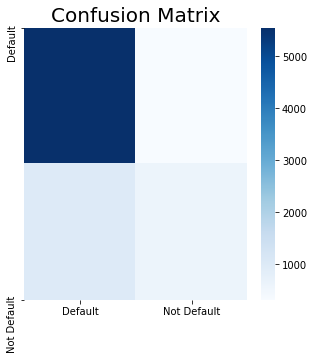

In [64]:
import seaborn as sns 
fig, (ax1) = plt.subplots(ncols =1, figsize=(5,5))
sns.heatmap(CM_GB,
           xticklabels=['Default', 'Not Default'],
           yticklabels=['Default', 'Not Default'],
           linecolor='Darkblue', cmap='Blues')
plt.title('Confusion Matrix', fontsize=20)
plt.show()